In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
import src.data.reader as rd
import src.features.bars as bar
from pathlib import PurePath
from src.utils.utils import *

pdir = get_relative_project_dir('FinML', partial=False)
# for notebook references
sys.path.extend([pdir])
print(pdir)

data_dir = pdir / 'data'
data_raw_dir = data_dir / 'raw'
data_interim_dir = data_dir / 'interim'
file_name = 'IVE_tickbidask'
file_ext = '.parq'

Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin


/Users/scottblunsden/Programs/FinML


In [2]:
parq_file_name = file_name + file_ext
# Load from parquet
infp = PurePath(data_raw_dir / parq_file_name)
df = pd.read_parquet(infp)
cprint(df)

/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2019-02-22 15:59:55  113.04  113.04  113.05   106   106   11982.24
2019-02-22 15:59:58  113.04  113.04  113.05   199   199   22494.96
2019-02-22 16:00:00  113.05  113.04  113.05  1147  1147  129668.35
2019-02-22 16:10:00  113.05  112.67  113.15     0     0       0.00
2019-02-22 18:30:00  113.05  112.57  113.59     0     0       0.00
--------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569099 entries, 2009-09-28 09:30:00 to 2019-02-22 18:30:00
Data columns (total 6 columns):
price    1569099 non-null float64
bid      1569099 non-null float64
ask      1569099 non-null float64
size     1569099 non-null int64
v        1569099 non-null int64
dv       1569099 non-null float64
dtypes: float64(4), int64(2)
memory usage: 83.8 MB
None
-------------------------------------------------------------------------------



In [3]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,569,099
volume ratio: 550.0
dollar ratio: 47849.0


In [4]:
bars = bar.Bars()
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tick_df = bars.tick_bar_df(df, 'price', tick_M)
n_ticks = tick_df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

cprint(tick_df)


  0%|          | 0/1569099 [00:00<?, ?it/s]

  9%|▊         | 136871/1569099 [00:00<00:01, 1368701.52it/s]

tick threshold: 100


 18%|█▊        | 276953/1569099 [00:00<00:00, 1378180.76it/s]

 25%|██▍       | 386431/1569099 [00:00<00:00, 1272735.57it/s]

 32%|███▏      | 507489/1569099 [00:00<00:00, 1253428.33it/s]

 42%|████▏     | 661100/1569099 [00:00<00:00, 1326667.28it/s]

 54%|█████▍    | 844478/1569099 [00:00<00:00, 1446684.21it/s]

 66%|██████▌   | 1030728/1569099 [00:00<00:00, 1550533.86it/s]

 77%|███████▋  | 1206145/1569099 [00:00<00:00, 1606477.50it/s]

 88%|████████▊ | 1377267/1569099 [00:00<00:00, 1636528.04it/s]

 99%|█████████▉| 1559553/1569099 [00:01<00:00, 1688296.12it/s]

100%|██████████| 1569099/1569099 [00:01<00:00, 1556533.34it/s]

num ticks: 15,690
volume ratio: 54969.0
dollar ratio: 4785218.0
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask  size    v          dv
dates                                                               
2019-02-22 09:52:42  112.8200  112.81  112.82   154  154  17374.2800
2019-02-22 10:59:58  112.8800  112.86  112.88   121  121  13658.4800
2019-02-22 12:24:49  112.9964  112.99  113.00   129  129  14576.5356
2019-02-22 13:57:48  112.9067  112.90  112.91   380  380  42904.5460
2019-02-22 15:22:33  112.8860  112.89  112.90   365  365  41203.3900
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15690 entries, 2009-09-28 09:53:14 to 2019-02-22 15:22:33
Data columns (total 6 columns):
price    15690 non-null float64
bid      15690 non-null float64
ask      1569

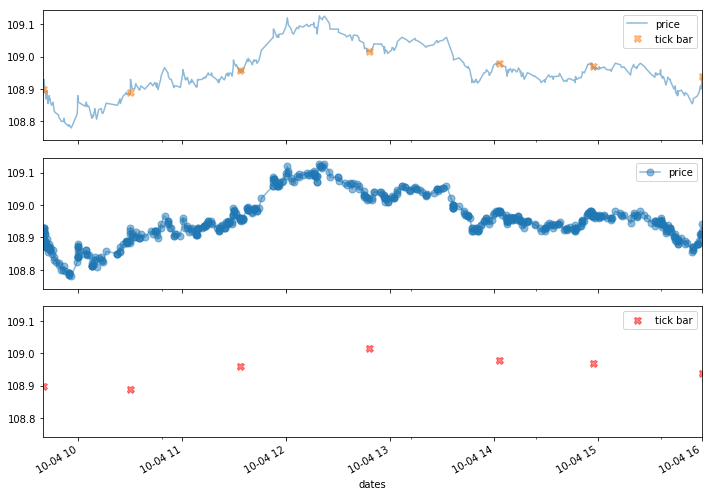

In [5]:
xDate ='2017-10-4'
xdf, xtdf = bars.select_sample_data(df, tick_df,'price',xDate)

xdf.shape, xtdf.shape
bars.plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)



In [6]:
sub = tick_df.price
ref = df.price

## uncomment below to run
tick_bars_ohlc = bars.get_ohlc(ref, sub)
print(tick_df.head())
print(tick_df.info(verbose=True))

parq_file_name = file_name + '_ohlc' + file_ext
# Load from parquet
outfp = PurePath(data_interim_dir / parq_file_name)
tick_bars_ohlc.to_parquet(outfp)

  0%|          | 0/15689 [00:00<?, ?it/s]

  1%|          | 151/15689 [00:00<00:10, 1503.94it/s]

  2%|▏         | 308/15689 [00:00<00:10, 1520.90it/s]

  3%|▎         | 465/15689 [00:00<00:09, 1532.85it/s]

  4%|▍         | 614/15689 [00:00<00:09, 1518.26it/s]

  5%|▍         | 773/15689 [00:00<00:09, 1537.92it/s]

  6%|▌         | 927/15689 [00:00<00:09, 1537.44it/s]

  7%|▋         | 1095/15689 [00:00<00:09, 1576.34it/s]

  8%|▊         | 1241/15689 [00:00<00:09, 1534.52it/s]

  9%|▉         | 1387/15689 [00:00<00:09, 1478.00it/s]

 10%|▉         | 1530/15689 [00:01<00:09, 1461.68it/s]

 11%|█         | 1677/15689 [00:01<00:09, 1462.83it/s]

 12%|█▏        | 1822/15689 [00:01<00:09, 1456.55it/s]

 13%|█▎        | 1966/15689 [00:01<00:09, 1444.17it/s]

 14%|█▎        | 2141/15689 [00:01<00:08, 1522.63it/s]

 15%|█▍        | 2308/15689 [00:01<00:08, 1562.36it/s]

 16%|█▌        | 2465/15689 [00:01<00:08, 1553.03it/s]

 17%|█▋        | 2645/15689 [00:01<00:08, 1616.96it/s]

 18%|█▊        | 2808/15689 [00:01<00:08, 1547.06it/s]

 19%|█▉        | 2964/15689 [00:02<00:10, 1224.63it/s]

 20%|█▉        | 3113/15689 [00:02<00:09, 1293.51it/s]

 21%|██        | 3261/15689 [00:02<00:09, 1342.14it/s]

 22%|██▏       | 3405/15689 [00:02<00:08, 1368.02it/s]

 23%|██▎       | 3550/15689 [00:02<00:08, 1390.94it/s]

 24%|██▎       | 3698/15689 [00:02<00:08, 1415.03it/s]

 25%|██▍       | 3856/15689 [00:02<00:08, 1460.29it/s]

 26%|██▌       | 4017/15689 [00:02<00:07, 1501.58it/s]

 27%|██▋       | 4184/15689 [00:02<00:07, 1547.06it/s]

 28%|██▊       | 4348/15689 [00:02<00:07, 1570.90it/s]

 29%|██▊       | 4507/15689 [00:03<00:07, 1567.48it/s]

 30%|██▉       | 4665/15689 [00:03<00:07, 1563.20it/s]

 31%|███       | 4824/15689 [00:03<00:06, 1571.00it/s]

 32%|███▏      | 4982/15689 [00:03<00:06, 1573.42it/s]

 33%|███▎      | 5140/15689 [00:03<00:06, 1559.67it/s]

 34%|███▍      | 5301/15689 [00:03<00:06, 1572.86it/s]

 35%|███▍      | 5459/15689 [00:03<00:06, 1568.94it/s]

 36%|███▌      | 5617/15689 [00:03<00:06, 1559.24it/s]

 37%|███▋      | 5776/15689 [00:03<00:06, 1565.70it/s]

 38%|███▊      | 5933/15689 [00:03<00:06, 1561.04it/s]

 39%|███▉      | 6090/15689 [00:04<00:06, 1487.90it/s]

 40%|███▉      | 6240/15689 [00:04<00:06, 1473.41it/s]

 41%|████      | 6401/15689 [00:04<00:06, 1510.94it/s]

 42%|████▏     | 6578/15689 [00:04<00:05, 1579.51it/s]

 43%|████▎     | 6738/15689 [00:04<00:05, 1577.27it/s]

 44%|████▍     | 6917/15689 [00:04<00:05, 1634.14it/s]

 45%|████▌     | 7108/15689 [00:04<00:05, 1706.28it/s]

 46%|████▋     | 7281/15689 [00:04<00:05, 1661.34it/s]

 47%|████▋     | 7449/15689 [00:04<00:05, 1597.58it/s]

 49%|████▊     | 7611/15689 [00:05<00:05, 1541.65it/s]

 50%|████▉     | 7767/15689 [00:05<00:05, 1540.59it/s]

 51%|█████     | 7923/15689 [00:05<00:05, 1512.56it/s]

 52%|█████▏    | 8098/15689 [00:05<00:04, 1576.54it/s]

 53%|█████▎    | 8257/15689 [00:05<00:04, 1559.87it/s]

 54%|█████▎    | 8415/15689 [00:05<00:04, 1565.09it/s]

 55%|█████▍    | 8573/15689 [00:05<00:04, 1561.17it/s]

 56%|█████▌    | 8730/15689 [00:05<00:04, 1523.42it/s]

 57%|█████▋    | 8886/15689 [00:05<00:04, 1534.09it/s]

 58%|█████▊    | 9044/15689 [00:05<00:04, 1544.67it/s]

 59%|█████▊    | 9203/15689 [00:06<00:04, 1555.49it/s]

 60%|█████▉    | 9360/15689 [00:06<00:04, 1558.99it/s]

 61%|██████    | 9521/15689 [00:06<00:03, 1573.09it/s]

 62%|██████▏   | 9680/15689 [00:06<00:03, 1577.37it/s]

 63%|██████▎   | 9838/15689 [00:06<00:03, 1575.41it/s]

 64%|██████▎   | 9996/15689 [00:06<00:03, 1571.24it/s]

 65%|██████▍   | 10154/15689 [00:06<00:03, 1569.71it/s]

 66%|██████▌   | 10317/15689 [00:06<00:03, 1585.42it/s]

 67%|██████▋   | 10476/15689 [00:06<00:03, 1581.43it/s]

 68%|██████▊   | 10635/15689 [00:06<00:03, 1534.61it/s]

 69%|██████▉   | 10789/15689 [00:07<00:03, 1499.48it/s]

 70%|██████▉   | 10940/15689 [00:07<00:03, 1488.18it/s]

 71%|███████   | 11090/15689 [00:07<00:03, 1474.59it/s]

 72%|███████▏  | 11239/15689 [00:07<00:03, 1477.67it/s]

 73%|███████▎  | 11387/15689 [00:07<00:02, 1449.33it/s]

 74%|███████▎  | 11547/15689 [00:07<00:02, 1490.98it/s]

 75%|███████▍  | 11703/15689 [00:07<00:02, 1509.55it/s]

 76%|███████▌  | 11855/15689 [00:07<00:02, 1497.89it/s]

 77%|███████▋  | 12006/15689 [00:07<00:02, 1490.19it/s]

 78%|███████▊  | 12160/15689 [00:07<00:02, 1504.18it/s]

 79%|███████▊  | 12333/15689 [00:08<00:02, 1563.12it/s]

 80%|███████▉  | 12491/15689 [00:08<00:02, 1553.61it/s]

 81%|████████  | 12671/15689 [00:08<00:01, 1618.07it/s]

 82%|████████▏ | 12834/15689 [00:08<00:01, 1607.33it/s]

 83%|████████▎ | 12996/15689 [00:08<00:01, 1590.55it/s]

 84%|████████▍ | 13156/15689 [00:08<00:01, 1584.52it/s]

 85%|████████▍ | 13319/15689 [00:08<00:01, 1594.86it/s]

 86%|████████▌ | 13480/15689 [00:08<00:01, 1597.00it/s]

 87%|████████▋ | 13640/15689 [00:08<00:01, 1584.59it/s]

 88%|████████▊ | 13799/15689 [00:08<00:01, 1581.48it/s]

 89%|████████▉ | 13958/15689 [00:09<00:01, 1574.68it/s]

 90%|████████▉ | 14116/15689 [00:09<00:00, 1573.07it/s]

 91%|█████████ | 14278/15689 [00:09<00:00, 1586.46it/s]

 92%|█████████▏| 14437/15689 [00:09<00:00, 1587.25it/s]

 93%|█████████▎| 14597/15689 [00:09<00:00, 1588.76it/s]

 94%|█████████▍| 14779/15689 [00:09<00:00, 1650.89it/s]

 95%|█████████▌| 14947/15689 [00:09<00:00, 1658.03it/s]

 96%|█████████▋| 15114/15689 [00:09<00:00, 1654.86it/s]

 97%|█████████▋| 15280/15689 [00:09<00:00, 1623.46it/s]

 98%|█████████▊| 15443/15689 [00:10<00:00, 1588.69it/s]

 99%|█████████▉| 15603/15689 [00:10<00:00, 1568.21it/s]

100%|██████████| 15689/15689 [00:10<00:00, 1541.75it/s]

/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


                       price    bid    ask  size     v         dv
dates                                                            
2009-09-28 09:53:14  51.1500  51.15  51.18   100   100    5115.00
2009-09-28 10:02:52  51.2500  51.24  51.26  2000  2000  102500.00
2009-09-28 10:22:24  51.1961  51.19  51.20  1100  1100   56315.71
2009-09-28 10:38:44  51.3650  51.36  51.36   100   100    5136.50
2009-09-28 11:24:29  51.3200  51.32  51.33  2000  2000  102640.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15690 entries, 2009-09-28 09:53:14 to 2019-02-22 15:22:33
Data columns (total 6 columns):
price    15690 non-null float64
bid      15690 non-null float64
ask      15690 non-null float64
size     15690 non-null int64
v        15690 non-null int64
dv       15690 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB
None


In [7]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = bars.volume_bar_df(df, 'v', volume_M)
print(v_bar_df.head())
print(v_bar_df.info(verbose=True))

parq_file_name = file_name + '_vol_m_' + str(volume_M) + file_ext
# Load from parquet
outfp = PurePath(data_interim_dir / parq_file_name)
v_bar_df.to_parquet(outfp)

  0%|          | 0/1569099 [00:00<?, ?it/s]

  8%|▊         | 122200/1569099 [00:00<00:01, 1221998.25it/s]

 17%|█▋        | 270201/1569099 [00:00<00:01, 1289431.13it/s]

volume threshold: 10,000


 27%|██▋       | 417097/1569099 [00:00<00:00, 1338503.65it/s]

 34%|███▎      | 527250/1569099 [00:00<00:00, 1255703.53it/s]

 42%|████▏     | 656139/1569099 [00:00<00:00, 1265478.10it/s]

 50%|████▉     | 782241/1569099 [00:00<00:00, 1264134.10it/s]

 58%|█████▊    | 904106/1569099 [00:00<00:00, 1250135.77it/s]

 65%|██████▍   | 1019741/1569099 [00:00<00:00, 1178521.76it/s]

 74%|███████▎  | 1154895/1569099 [00:00<00:00, 1225589.69it/s]

 84%|████████▍ | 1315340/1569099 [00:01<00:00, 1319025.18it/s]

 95%|█████████▍| 1485826/1569099 [00:01<00:00, 1415099.70it/s]

100%|██████████| 1569099/1569099 [00:01<00:00, 1350372.26it/s]

                     price    bid    ask  size     v        dv
dates                                                         
2009-09-28 09:44:09  50.91  50.91  50.92  1100  1100   56001.0
2009-09-28 09:46:35  51.07  51.05  51.07  3300  3300  168531.0
2009-09-28 09:52:47  51.13  51.13  51.14  2000  2000  102260.0
2009-09-28 09:54:36  51.13  51.11  51.13   400   400   20452.0
2009-09-28 09:54:41  51.14  51.13  51.14   700   700   35798.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66638 entries, 2009-09-28 09:44:09 to 2019-02-22 15:56:48
Data columns (total 6 columns):
price    66638 non-null float64
bid      66638 non-null float64
ask      66638 non-null float64
size     66638 non-null int64
v        66638 non-null int64
dv       66638 non-null float64
dtypes: float64(4), int64(2)
memory usage: 3.6 MB
None


xdf shape: (626,), xtdf shape: (20,)


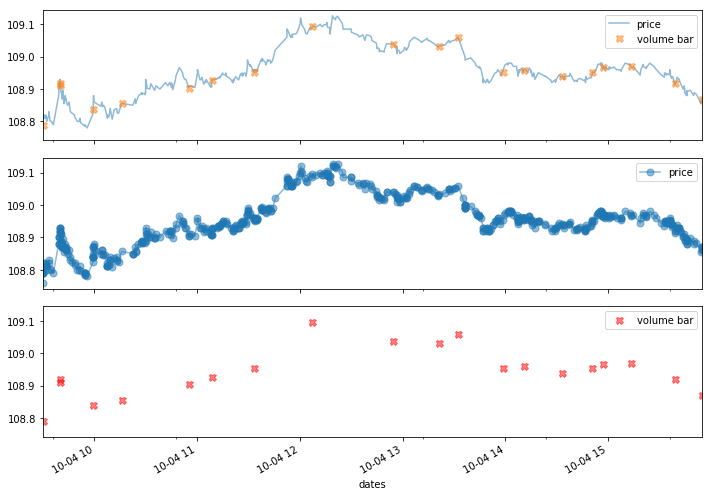

In [8]:
xdf, xtdf = bars.select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

bars.plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7) 

In [13]:
dollar_M =  1_000_000 # arbitrary 
print(f'Dollar volume threshold: {volume_M:,}')
dv_bar_df = bars.dollar_bar_df(df, 'dv', dollar_M)
cprint(dv_bar_df)

parq_file_name = file_name + '_dv_m_' + str(dollar_M) + file_ext
# Save to parquet
outfp = PurePath(data_interim_dir / parq_file_name)
dv_bar_df.to_parquet(outfp)

  0%|          | 0/1569099 [00:00<?, ?it/s]

  8%|▊         | 124235/1569099 [00:00<00:01, 1242339.34it/s]

 17%|█▋        | 268318/1569099 [00:00<00:01, 1295896.17it/s]

Dollar volume threshold: 10,000


 25%|██▌       | 398154/1569099 [00:00<00:00, 1296463.39it/s]

 33%|███▎      | 520216/1569099 [00:00<00:00, 1272738.28it/s]

 40%|███▉      | 626620/1569099 [00:00<00:00, 1190792.03it/s]

 47%|████▋     | 742937/1569099 [00:00<00:00, 1182368.13it/s]

 57%|█████▋    | 897889/1569099 [00:00<00:00, 1272844.05it/s]

 68%|██████▊   | 1059615/1569099 [00:00<00:00, 1359714.08it/s]

 77%|███████▋  | 1210039/1569099 [00:00<00:00, 1400065.91it/s]

 86%|████████▌ | 1353323/1569099 [00:01<00:00, 1409739.03it/s]

 96%|█████████▌| 1501483/1569099 [00:01<00:00, 1430550.03it/s]

100%|██████████| 1569099/1569099 [00:01<00:00, 1370471.49it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask   size      v            dv
dates                                                                    
2019-02-22 15:39:21  112.8400  112.84  112.85   5800   5800  6.544720e+05
2019-02-22 15:46:33  112.9332  112.93  112.94    142    142  1.603651e+04
2019-02-22 15:54:08  112.9271  112.92  112.93   2500   2500  2.823178e+05
2019-02-22 15:56:48  113.0400  113.03  113.04   2900   2900  3.278160e+05
2019-02-22 15:56:48  113.0400  113.03  113.04  10514  10514  1.188503e+06
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57493 entries, 2009-09-28 09:46:35 to 2019-02-22 15:56:48
Data columns (total 6 columns):
price    57493 non-null float64
bid      57493 non-null float64
ask      57493 non-null float64
size     5

xdf shape: (626,), xtdf shape: (21,)


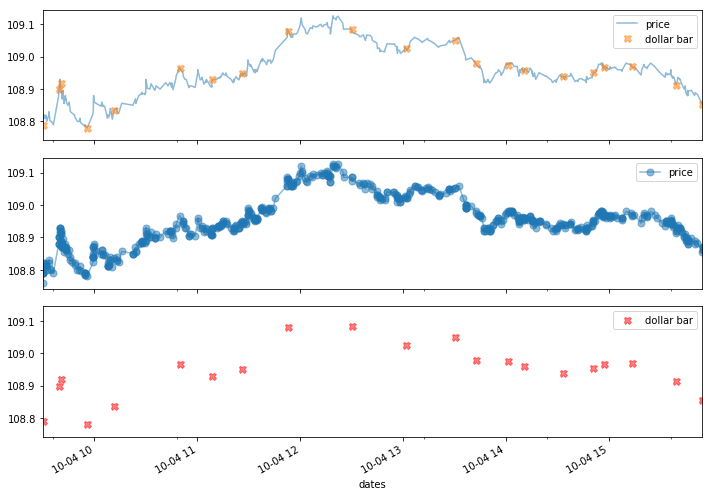

In [10]:
xdf, xtdf = bars.select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

bars.plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

/Users/scottblunsden/Programs/FinML/src/features/bars.py:113: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  return df.groupby(pd.TimeGrouper(group))[price_col].count()


tick count: 15,690
volume count: 66,638
dollar count: 57,493
raw count: 1,569,099


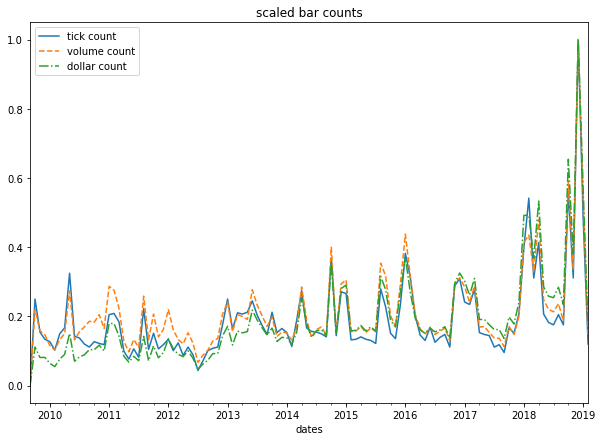

In [11]:
# count series
# scale to compare 'apples to apples'
tc = bars.scale(bars.count_bars(tick_df, '1M'))
vc = bars.scale(bars.count_bars(v_bar_df, '1M'))
dc = bars.scale(bars.count_bars(dv_bar_df, '1M'))
dfc = bars.scale(bars.count_bars(df, '1M'))

print(f'tick count: {tick_df.price.count():,}')
print(f'volume count: {v_bar_df.price.count():,}')
print(f'dollar count: {dv_bar_df.price.count():,}')
print(f'raw count: {df.price.count():,}')

# plot time series of count
# import visual tools
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()